In [3]:
import tensorflow as tf 


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #스케일링 

In [16]:
x_train.min(), x_train.max(), x_train.shape
y_train.min(), y_train.max(), y_train.shape

(0.0, 1.0, (60000, 28, 28))

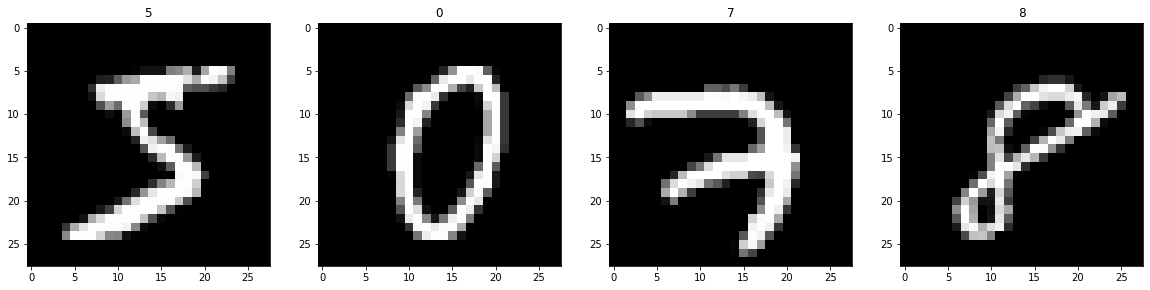

In [20]:
import matplotlib.pyplot as plt 
num=[0,1000,5000,59999]

cnt=0
plt.figure(figsize=(20,5))
tmp=[]
for x in num:
    cnt+=1
    plt.subplot(1,len(num),cnt)
    plt.imshow(x_train[x], cmap='gray')
    plt.title(y_train[x])

    if y_train[x]=='7':
        tmp.append(y_train[x])

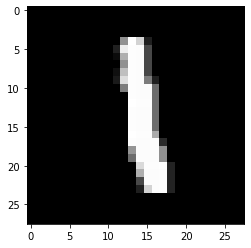

In [24]:
plt.imshow(x_train[6], cmap='gray')

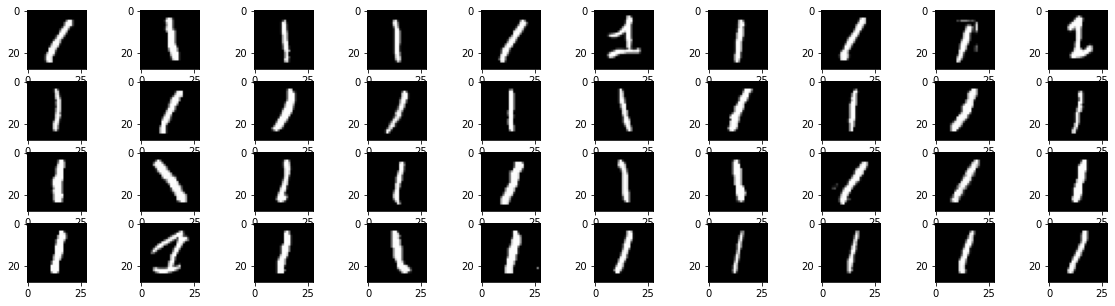

In [36]:
## 숫자 7만 지정한 숫자만큼 꺼내보세요! 

num=input('보고싶은 숫자 넘버를 넣어주세요 0~9==>')
xList=[]
plt.figure(figsize=(20,5))

for x,y in zip(x_train,y_train):
    if y==int(num):
        xList.append(x)

showCount=40
for x in range(showCount):
    plt.subplot(int(showCount/10),10,x+1)
    plt.imshow(xList[x],cmap='gray')


Text(0.5, 1.0, 'test_value_count')

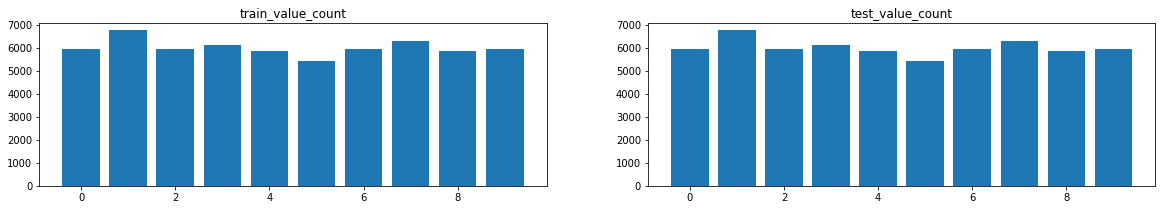

In [40]:
# 데이터편향여부 확인 
import numpy as np

plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
tmp=np.unique(y_train,return_counts=True)
plt.bar(tmp[0],tmp[1])
plt.title('train_value_count')

plt.subplot(1,2,2)
tmp=np.unique(y_train,return_counts=True)
plt.bar(tmp[0],tmp[1])
plt.title('test_value_count')

In [4]:
# 28*28의 가로세로를 한줄로 만들어서 784개의 x변수제작 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 기본 제공되는 32개의 배치 단위로 w,b를 갱신하고 1 epoche가 끝나면
# 그 w,b를 validation_data에 넣어서 검증함 
# 오버피팅(과적합): 훈련데이터의 loss는 점점 작아지는데, validation_data의 loss는 점점 커지는 지점

model.fit(x_train,y_train,validation_data=(x_train,y_train),epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3060 - accuracy: 0.9109 - val_loss: 0.1410 - val_accuracy: 0.9599
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1494 - accuracy: 0.9558 - val_loss: 0.0881 - val_accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1123 - accuracy: 0.9662 - val_loss: 0.0682 - val_accuracy: 0.9805
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0913 - accuracy: 0.9716 - val_loss: 0.0513 - val_accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0780 - accuracy: 0.9752 - val_loss: 0.0459 - val_accuracy: 0.9858


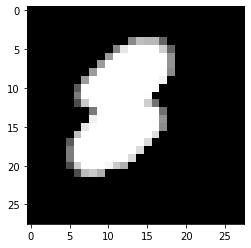

1/1 [==============================] - 0s 21ms/step
I predict number: 8


array([[7.4306666e-04, 1.3038191e-06, 2.0222975e-02, 2.2927747e-05,
        1.8528692e-02, 5.6326890e-04, 1.0136168e-04, 4.1543740e-06,
        9.5597732e-01, 3.8349561e-03]], dtype=float32)

In [26]:
# 내가 쓴 손글씨 인식하기 

import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np

img=Image.open('../ML/num8.png').convert('L')
img=img.resize((28,28))
imgArr=255-np.array(img)
imgSc=imgArr/255
plt.imshow(imgSc,cmap='gray')
plt.show()

pr=model.predict(imgSc.reshape(1,28,28)) #0~9 위치값 해당 확률, reshape를 꼭 넣어야 함 
print("I predict number:",np.argmax(pr))
pr

In [ ]:
# 내가 쓴 손글씨 인식하기 - 슬기 추가 개발 

import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np

img=Image.open('../ML/num8.png').convert('L')
img=img.resize((28,28))
imgArr=255-np.array(img)
imgSc=imgArr/255
plt.imshow(imgSc,cmap='gray')
plt.show()

pr=model.predict(imgSc.reshape(1,28,28)) #0~9 위치값 해당 확률, reshape를 꼭 넣어야 함 
print("I predict number:",np.argmax(pr))
pr

In [35]:
# 선생님 ppt자료 
import numpy as np

'''
스칼라-> 벡터-> array-> 텐서 
스칼라: 3,4,a 
벡터(방향과 크기를 갖고 있는 스칼라 집합): [3]
array(성격과 크기가 같은 벡터의 집합) 
tensor: [array]
'''

x=[[25,1,2,1],
  [20,0,0,2],
  [8,1,1,5],
  [15,1,0,2],
  [35,0,3,1],
  [40,0,5,4]]

x=np.array(x)
w=[0.3,0.2,0.5,0.1]
b=[0.1]

np.sum(x*w,axis=1)+b, np.dot(x,w)+b
y_hat=np.sum(x*w,axis=1)+b

(array([ 8.9,  6.3,  3.7,  5. , 12.2, 15. ]),
 array([ 8.9,  6.3,  3.7,  5. , 12.2, 15. ]))

In [38]:
# 선생님 ppt자료 
# 뉴럴네트워크(NN:Neural Network)의 파라미터와 히든레이어에 대한 작업전 필수 이해 
import numpy as np

'''
스칼라-> 벡터-> array-> 텐서 
스칼라: 3,4,a 
벡터(방향과 크기를 갖고 있는 스칼라 집합): [3]
array(성격과 크기가 같은 벡터의 집합) 
tensor: [array]
'''

x=[[25,1,2,1],
  [20,0,0,2],
  [8,1,1,5],
  [15,1,0,2],
  [35,0,3,1],
  [40,0,5,4]]

x=np.array(x)

# 레이어 1층을 구축, 활성화 함수는 wx+b를 하고 난 뒤 
## 0 보다 작으면 0으로, 그 외는 원래값으로 보존하는 Relu 활성화 함수 적용
## Relu함수는 이미지넷 프로젝트의 성공을 이끈 함수 
## (일반적으로 맨 마지막 출력층을 제외한 모든 곳에 사용)
# dense(unit=2)
w=[[0.3,0.1],[0.2,0.7],[0.5,0.4],[0.1,0.1]]
b=[0.1,0.7] 
w=np.array(w);b=np.array(b)

y_hat_0=np.sum(x*w[:,0],axis=1)+b[0]
y_hat_1=np.sum(x*w[:,1],axis=1)+b[1]

y_hat_0[y_hat_0<0]=0
y_hat_1[y_hat_1<0]=0

y_hat_0,y_hat_1

(array([ 8.9,  6.3,  3.7,  5. , 12.2, 15. ]),
 array([4.8, 2.9, 3.1, 3.1, 5.5, 7.1]))

In [40]:
# 1레이어에서 output된 y_hat 2개가 다음 레이어의 input data 
x=[]
for x1,x2 in zip(y_hat_0,y_hat_1):
    x.append([])
    x[-1].append(x1)
    x[-1].append(x2)

# 2레이어의 w값과 b값을 unit 5개로 한다면 
w=[[1,2,3,4,5],[2,3,1,1,3]]
b=[1,2,3,4,5]

w=np.array(w);b=np.array(b)

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 785       
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________
